In [1]:
import numpy as np
from typing import Any, cast
import matplotlib.pyplot as plt

def collar_pnl(market_price_expiry:np.ndarray, market_price_open:float, strike_put:float, premium_put:float, strike_call:float, premium_call:float) -> np.ndarray:
    """Calculates the PnL for a collar strategy."""
    # Long stock PnL
    pnl_stock = market_price_expiry - market_price_open

    # Long put PnL (buy put option)
    # The profit from buying a put is max(strike - price, 0) - premium
    pnl_long_put = np.maximum(strike_put - market_price_expiry, 0) - premium_put

    # Short call PnL (sell call option)
    # The profit from selling a call is premium - max(price - strike, 0)
    pnl_short_call = premium_call - np.maximum(market_price_expiry - strike_call, 0)

    # Total PnL for collar strategy
    total_pnl = pnl_stock + pnl_long_put + pnl_short_call
    return 100 * total_pnl

def plot_collar_strategy(market_price_open:float, strike_put:float, premium_put:float, strike_call:float, premium_call: float):
    global plt

    break_even_point = market_price_open + premium_put - premium_call

    # --- Generate Market Prices at Expiry ---
    # Create a range of possible market prices at expiry for the X-axis
    market_prices_expiry = np.linspace(market_price_open * 0.5, market_price_open * 1.5, 200)

    # --- Calculate PnLs for each expiry prices ---
    pnls = collar_pnl(market_prices_expiry, market_price_open, strike_put, premium_put, strike_call, premium_call)

    plt = cast(Any, plt)  # Pylance: matplotlib stubs are incomplete.
    # --- Plotting the PnL Chart ---
    linewidth=1.3
    plt.figure(figsize=(15, 5))
    plt.plot(market_prices_expiry, pnls, label='Collar Strategy PnL', color='blue')
    plt.axhline(0, color='gray', linestyle='--', linewidth=linewidth, label='Break-even line')
    plt.axvline(market_price_open, color='green', linestyle=':', linewidth=linewidth)
    plt.axvline(strike_put, color='red', linestyle=':', linewidth=linewidth)
    plt.axvline(strike_call, color='purple', linestyle=':', linewidth=linewidth)
    plt.axvline(break_even_point, color='orange', linestyle='--', linewidth=1.5*linewidth) # Added break-even line

    ax = plt.gca()
    ax.set_ylim(-600,700)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    xticks = sorted([strike_call, strike_put, break_even_point, market_price_open])
    xticklabels = ['']*len(xticks)
    xticklabels[xticks.index(strike_call)] = f'{strike_call} Call Strike'
    xticklabels[xticks.index(strike_put)] = f'{strike_put} Put Strike'
    xticklabels[xticks.index(break_even_point)] = f'{break_even_point} Break-even'
    xticklabels[xticks.index(market_price_open)] = f'{market_price_open} Market Open'

    ax.set_xlim(strike_put*0.9, strike_call*1.1)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)


    plt.title('Collar Strategy PnL at Expiry')
    plt.xlabel('Market Price at Expiry')
    plt.ylabel('Profit/Loss (PnL)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),
        borderaxespad=0.0
        )
    plt.tight_layout()
    plt.show()

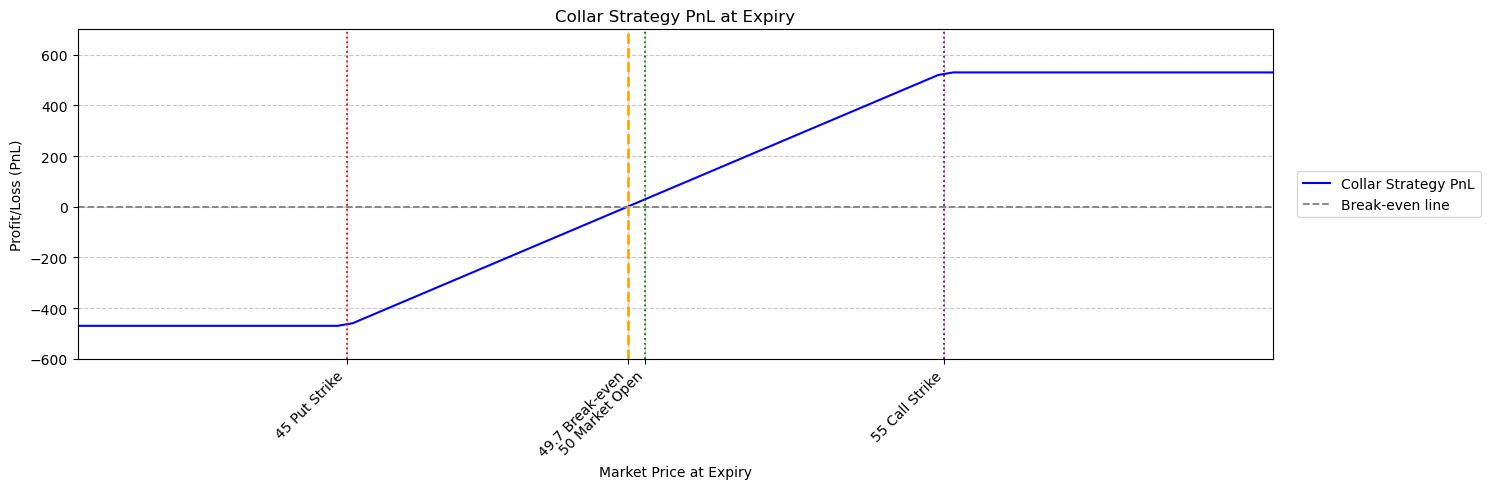

In [2]:
plot_collar_strategy(
    market_price_open = 50,
    strike_put = 45,
    premium_put = 0.2,
    strike_call = 55,
    premium_call = 0.5)


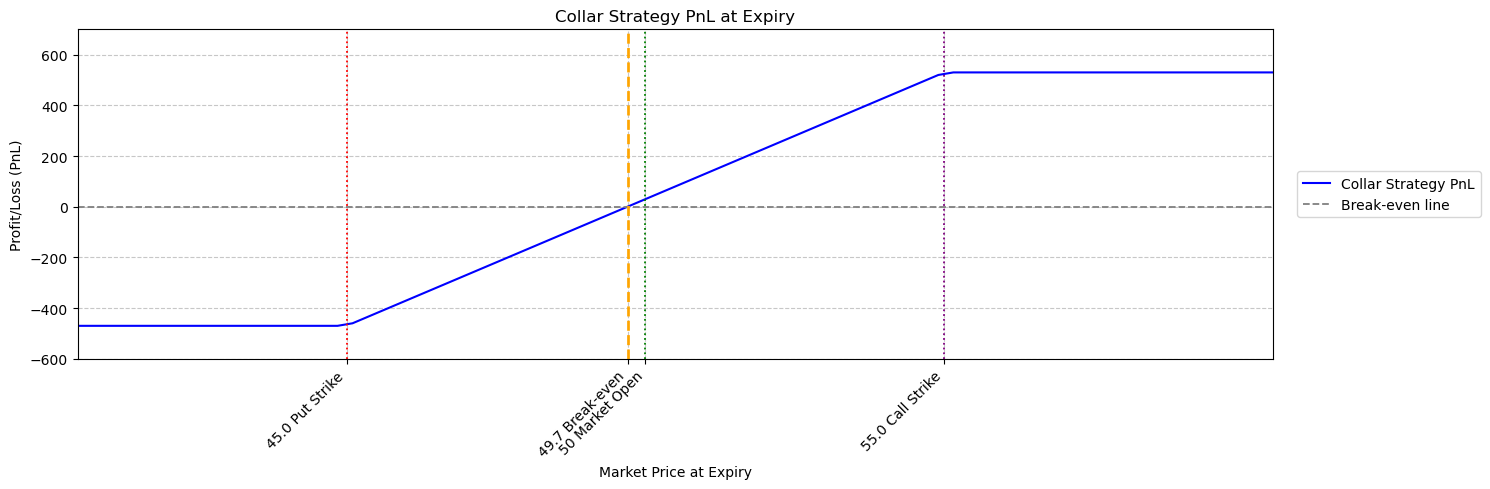

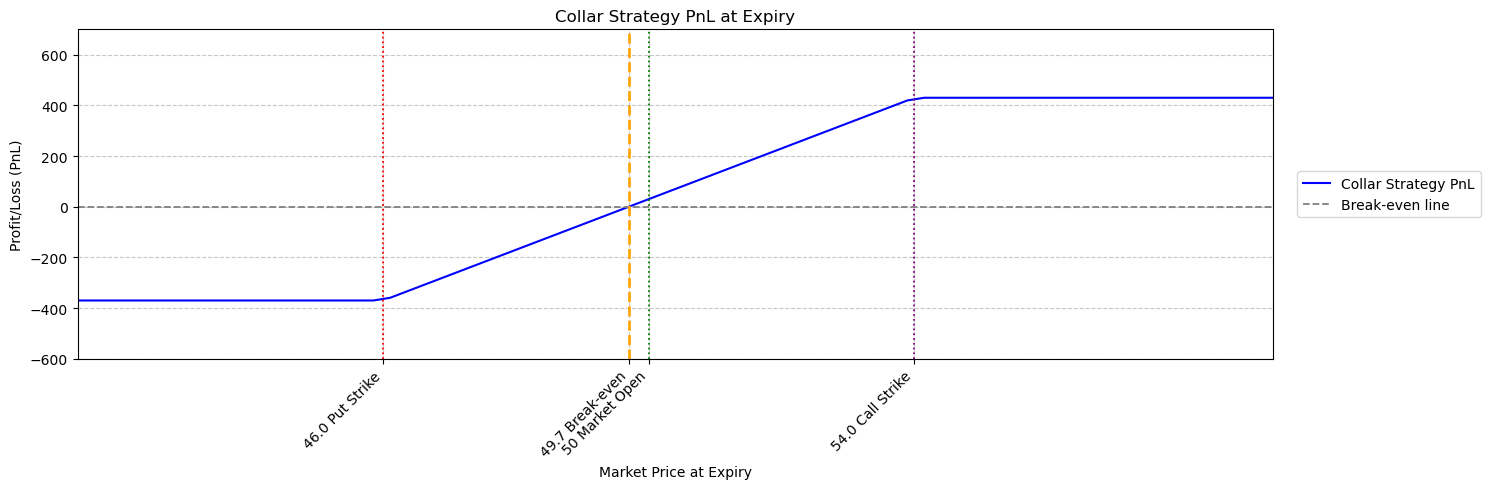

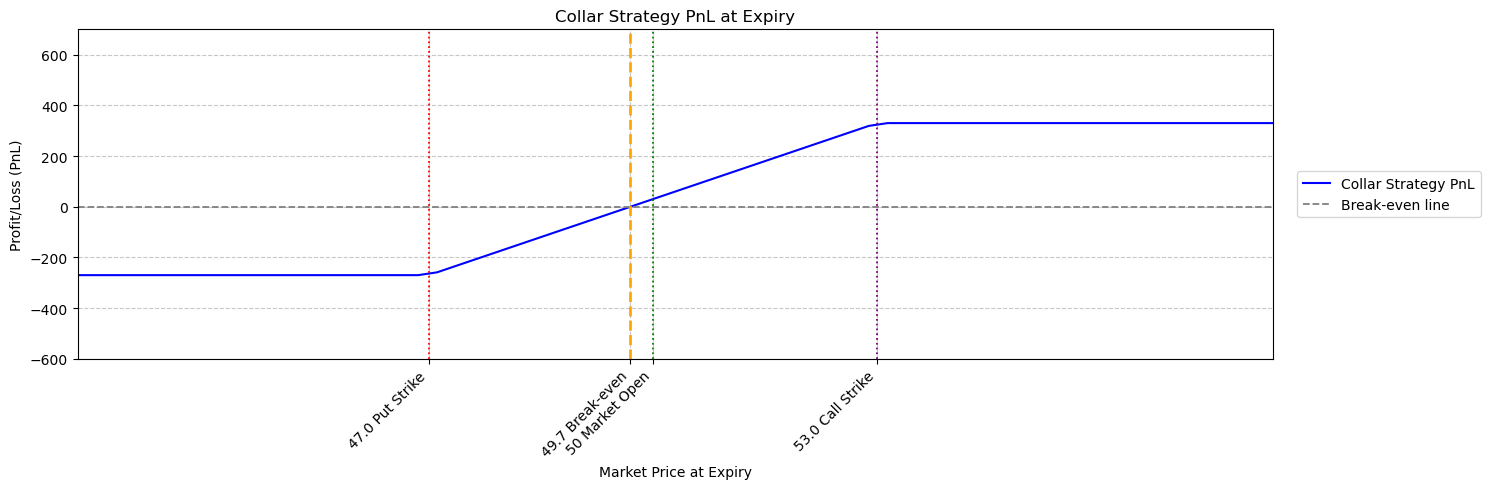

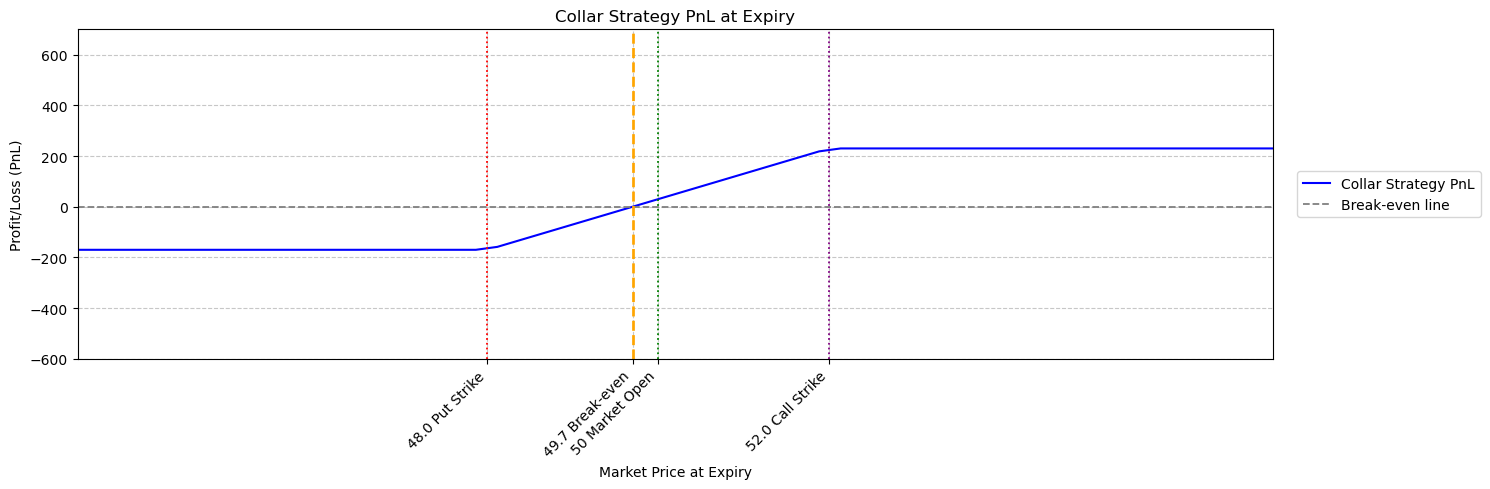

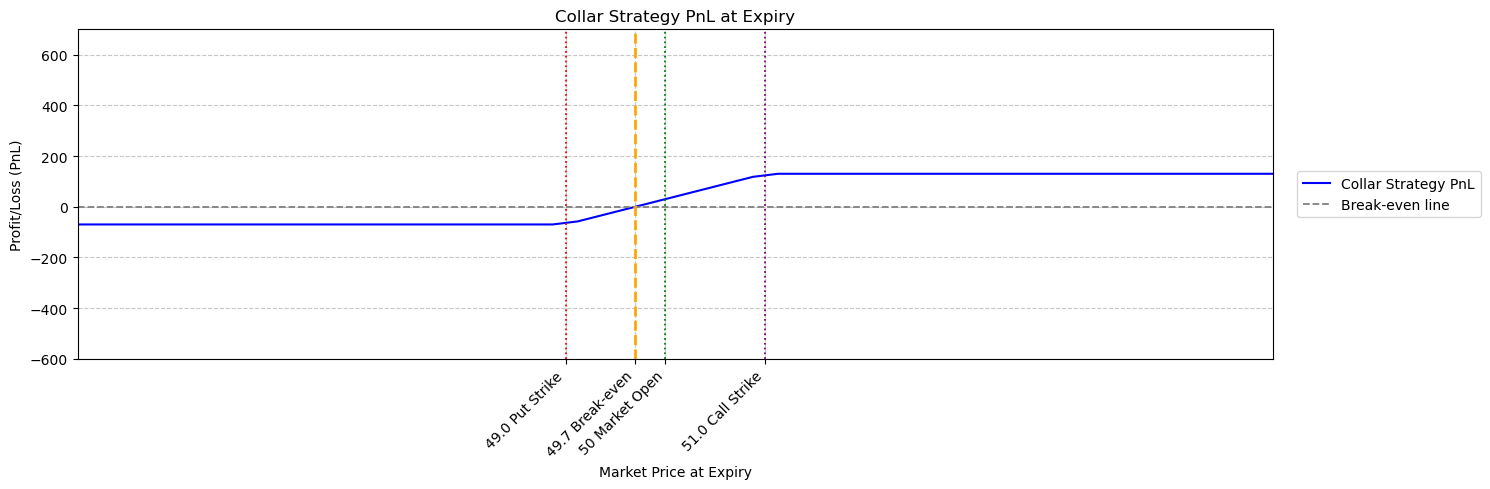

In [3]:
spread:float
for spread in range(10,1,-2):
    market_price_open:float = 50
    plot_collar_strategy(
        market_price_open,
        strike_put = market_price_open - spread / 2.0,
        premium_put = 0.2,
        strike_call = market_price_open + spread / 2.0,
        premium_call = 0.5)
